# Using Python for Research Homework: Week 5, Case Study Part 2

The [movie dataset on which this case study is based](https://www.kaggle.com/tmdb/tmdb-movie-metadata) is a database of 5000 movies catalogued by [The Movie Database (TMDb)](https://www.themoviedb.org/?language=en). The information available about each movie is its budget, revenue, rating, actors and actresses, etc. In this case study, we will use this dataset to determine whether any information about a movie can predict the total revenue of a movie. We will also attempt to predict whether a movie's revenue will exceed its budget.

In Part 2, we will use the dataset prepared in Part 1 for an applied analysis.

In [22]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# EDIT THIS CODE TO LOAD THE SAVED DF FROM THE LAST HOMEWORK
df = pd.read_csv('movies_clean.csv')

### Exercise 1

In Part 2 of this case study, we will primarily use the two models we recently discussed: linear/logistic regression and random forests to perform prediction and classification. We will use these methods to predict revenue, and we will use logistic regression to classify whether a movie was profitable.

In this exercise, we will instantiate regression and classification models. Code is provided that prepares the covariates and outcomes we will use for data analysis.

#### Instructions
- Instantiate `LinearRegression()`, `LogisticRegression()`, `RandomForestRegressor()`, and `RandomForestClassifier()` objects, and assign them to `linear_regression`, `logistic_regression`, `forest_regression`, and `forest_classifier`, respectively.
- For the random forests models, specify `max_depth=4` and `random_state=0`.

In [23]:
# Define all covariates and outcomes from `df`.
regression_target = 'revenue'
classification_target = 'profitable'
all_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']

regression_outcome = df[regression_target]
classification_outcome = df[classification_target]
covariates = df[all_covariates]

# Instantiate all regression models and classifiers.
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)

### Exercise 2

In this exercise, we will create two functions that compute a model's score. For regression models, we will use correlation as the score. For classification models, we will use accuracy as the score.

#### Instructions 
- Define a function called `correlation` with arguments `estimator`, `X`, and `y`. The function should compute the correlation between the observed outcome `y` and the outcome predicted by the model.
    - To obtain predictions, the function should first use the `fit` method of `estimator` and then use the `predict` method from the fitted object.
    - The function should return the first argument from `r2_score` comparing `predictions` and `y`.
- Define a function called `accuracy` with the same arguments and code, substituting `accuracy_score` for `r2_score`.

In [24]:
# Enter your code here.
from sklearn.metrics import r2_score, accuracy_score

# Function to compute correlation (R^2 score)
def correlation(estimator, X, y):
    """
    Computes the correlation (R^2 score) between observed outcome y
    and predicted outcome by the model estimator.
    """
    # Fit the estimator on the data
    estimator.fit(X, y)
    
    # Generate predictions
    predictions = estimator.predict(X)
    
    # Compute and return the R^2 score
    return r2_score(y, predictions)

# Function to compute accuracy
def accuracy(estimator, X, y):
    """
    Computes the accuracy between observed outcome y
    and predicted outcome by the model estimator.
    """
    # Fit the estimator on the data
    estimator.fit(X, y)
    
    # Generate predictions
    predictions = estimator.predict(X)
    
    # Compute and return the accuracy score
    return accuracy_score(y, predictions)

### Exercise 3

In this exercise, we will compute the cross-validated performance for the linear and random forest regression models.

#### Instructions 

- Call `cross_val_score` using `linear_regression` and `forest regression` as models. Store the output as `linear_regression_scores` and `forest_regression_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=correlation` to use our `correlation` function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models.
- Which of the two models exhibits a better fit?

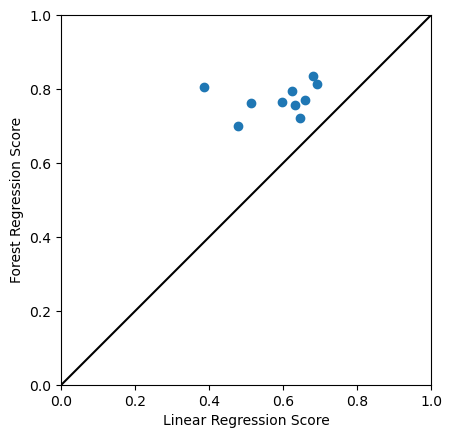

Mean Linear Regression Score: 0.5904178649537114
Mean Random Forest Regression Score: 0.7725584078584653


In [35]:
from sklearn.model_selection import cross_val_score

# Determine the cross-validated correlation for linear and random forest models.
linear_regression_scores = cross_val_score(
    linear_regression, covariates, regression_outcome, cv=10, scoring=correlation
)
forest_regression_scores = cross_val_score(
    forest_regression, covariates, regression_outcome, cv=10, scoring=correlation
)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')  # Reference diagonal line

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

# Show the plot
plt.show()
print("Mean Linear Regression Score:", linear_regression_scores.mean())
print("Mean Random Forest Regression Score:", forest_regression_scores.mean())

### Exercise 4

In this exercise, we will compute cross-validated performance for the linear and random forest classification models.

#### Instructions 
- Call `cross_val_score` using `logistic_regression` and `forest_classifier` as models. Store the output as `logistic_regression_scores` and `forest_classification_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=accuracy` to use our accuracy function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the accuracy of predicted profitability for each cross-validation fold using the logistic and random forest classification models.
- Which of the two models exhibits a better fit?

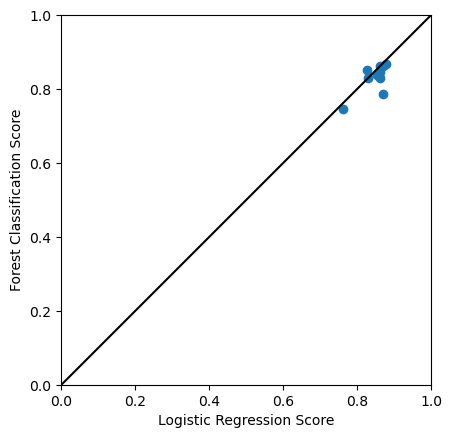

Mean Linear Regression Score: 0.5904178649537114
Mean Random Forest Regression Score: 0.7725584078584653


In [36]:




# Retry cross-validation
logistic_regression_scores = cross_val_score(
    logistic_regression, covariates, df['profitable'], cv=10, scoring='accuracy'
)
forest_classification_scores = cross_val_score(
    forest_classifier, covariates, df['profitable'], cv=10, scoring='accuracy'
)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')  # Reference diagonal line

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Logistic Regression Score")
plt.ylabel("Forest Classification Score")

plt.show()
print("Mean Linear Regression Score:", linear_regression_scores.mean())
print("Mean Random Forest Regression Score:", forest_regression_scores.mean())

### Exercise 5 

In Exercise 3, we saw that predicting revenue was only moderately successful. It might be the case that predicting movies that generated precisely no revenue is difficult. In the next three exercises, we will exclude these movies, and rerun the analyses to determine if the fits improve. In this exercise, we will rerun the regression analysis for this subsetted dataset.

#### Instructions 

- Define `positive_revenue_df` as the subset of movies in `df` with `revenue` greater than zero.
- Code is provided below that creates new instances of model objects. Replace all instances of `df` with `positive_revenue_df`, and run the given code.

In [37]:
# Define the subset of movies with positive revenue
positive_revenue_df = df[df['revenue'] > 0]

# Replace the dataframe in the following code
regression_outcome = positive_revenue_df[regression_target]
classification_outcome = positive_revenue_df[classification_target]
covariates = positive_revenue_df[all_covariates]

# Reinstantiate all regression models and classifiers
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)

# Compute cross-validation scores for regression models
linear_regression_scores = cross_val_score(
    linear_regression, covariates, regression_outcome, cv=10, scoring=correlation
)
forest_regression_scores = cross_val_score(
    forest_regression, covariates, regression_outcome, cv=10, scoring=correlation
)

# Compute cross-validation scores for classification models
logistic_regression_scores = cross_val_score(
    logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy
)
forest_classification_scores = cross_val_score(
    forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy
)

# Display results
print("Linear Regression Scores:", linear_regression_scores)
print("Random Forest Regression Scores:", forest_regression_scores)
print("Logistic Regression Scores:", logistic_regression_scores)
print("Random Forest Classification Scores:", forest_classification_scores)

# Calculate the mean of the 10 cross-validation scores
mean_forest_score = forest_regression_scores.mean()

# Print the result
print("Mean Random Forest Regression Score:", mean_forest_score)


Linear Regression Scores: [0.68103082 0.69223883 0.59762479 0.63074155 0.62351238 0.65828904
 0.38594805 0.64576018 0.51220714 0.47682587]
Random Forest Regression Scores: [0.83552202 0.8147779  0.76387032 0.7572025  0.79467131 0.76918022
 0.80491922 0.72191439 0.76225876 0.70126744]
Logistic Regression Scores: [0.93495935 0.95121951 0.94308943 0.88617886 0.91056911 0.90243902
 0.90983607 0.90983607 0.86885246 0.86885246]
Random Forest Classification Scores: [0.99186992 1.         0.98373984 0.98373984 0.99186992 0.99186992
 0.97540984 0.97540984 0.92622951 0.93442623]
Mean Random Forest Regression Score: 0.7725584078584653


### Exercise 6

In this exercise, we will compute the cross-validated performance for the linear and random forest regression models for positive revenue movies only.

#### Instructions 

- Call `cross_val_score` using `linear_regression` and `forest regression` as models. Store the output as `linear_regression_scores` and `forest_regression_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=correlation` to use our `correlation` function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models.
- Which of the two models exhibits a better fit? Is this result different from what we observed when considering all movies?
- Code is provided for you that prints the importance of each covariate in predicting revenue using the random forests classifier. 
    - Which variables are most important?

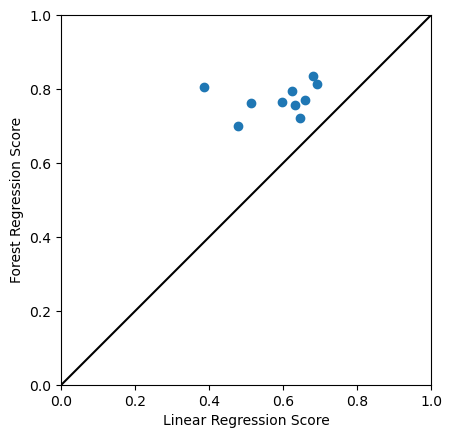

Feature Importances:
vote_count: 0.5921
budget: 0.3222
popularity: 0.0563
runtime: 0.0136
vote_average: 0.0097
Adventure: 0.0015
Action: 0.0013
Animation: 0.0008
Science Fiction: 0.0007
Comedy: 0.0003
Drama: 0.0003
Family: 0.0003
History: 0.0002
Crime: 0.0002
Thriller: 0.0002
Western: 0.0001
Documentary: 0.0001
Horror: 0.0001
Foreign: 0.0000
Fantasy: 0.0000
Romance: 0.0000
Mystery: 0.0000
War: 0.0000
Music: 0.0000
TV Movie: 0.0000


In [33]:
from sklearn.model_selection import cross_val_score

# Determine the cross-validated correlation for linear and random forest models
linear_regression_scores = cross_val_score(
    linear_regression, positive_revenue_df[all_covariates], positive_revenue_df[regression_target], cv=10, scoring=correlation
)
forest_regression_scores = cross_val_score(
    forest_regression, positive_revenue_df[all_covariates], positive_revenue_df[regression_target], cv=10, scoring=correlation
)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')  # Reference diagonal line

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

# Show the plot
plt.show()

# Print the importance of each covariate in the random forest regression
forest_regression.fit(positive_revenue_df[all_covariates], positive_revenue_df[regression_target])
feature_importances = sorted(
    list(zip(all_covariates, forest_regression.feature_importances_)),
    key=lambda tup: tup[1],
    reverse=True
)
print("Feature Importances:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance:.4f}")


### Exercise 7

In this exercise, we will compute cross-validated performance for the linear and random forest classification models for positive revenue movies only.

#### Instructions 

- Call `cross_val_score` using `logistic_regression` and `forest classifer` as models. Store the output as `logistic_regression_scores` and `forest_classification_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=accuracy` to use our `accuracy` function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models.
- Which of the two models exhibits a better fit? Is this result different from what we observed when considering all movies?
- Code is provided for you that prints the importance of each covariate in predicting profitabilitiy using the random forests classifier. 
    - Which variables are most important?

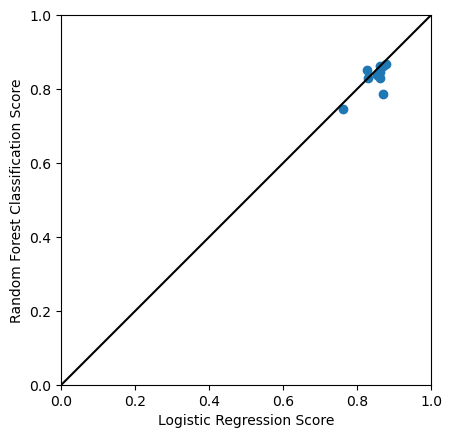

Feature Importances:
vote_count: 0.3805
popularity: 0.3108
vote_average: 0.1002
budget: 0.0660
runtime: 0.0414
Drama: 0.0196
Science Fiction: 0.0084
Family: 0.0077
War: 0.0063
Documentary: 0.0062
Western: 0.0058
Action: 0.0056
Thriller: 0.0045
History: 0.0045
Adventure: 0.0045
Mystery: 0.0043
Crime: 0.0042
Romance: 0.0041
Fantasy: 0.0040
Comedy: 0.0034
Music: 0.0029
Horror: 0.0026
Animation: 0.0016
Foreign: 0.0009
TV Movie: 0.0000


In [34]:
from sklearn.model_selection import cross_val_score

# Define positive revenue subset
positive_revenue_df = df[df['revenue'] > 0]

# Define covariates and classification outcome for positive revenue movies
covariates = positive_revenue_df[all_covariates]
classification_outcome = positive_revenue_df['profitable']

# Compute cross-validated accuracy for logistic and random forest models
logistic_regression_scores = cross_val_score(
    logistic_regression, covariates, classification_outcome, cv=10, scoring='accuracy'
)
forest_classification_scores = cross_val_score(
    forest_classifier, covariates, classification_outcome, cv=10, scoring='accuracy'
)

# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')  # Reference diagonal line

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Logistic Regression Score")
plt.ylabel("Random Forest Classification Score")

# Show the plot
plt.show()

# Print the importance of each covariate in the random forest classification
forest_classifier.fit(covariates, classification_outcome)
feature_importances = sorted(
    list(zip(all_covariates, forest_classifier.feature_importances_)),
    key=lambda x: x[1],
    reverse=True
)
print("Feature Importances:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance:.4f}")
